In [9]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Base Risco de Crédito ##

In [3]:
with open ('data/risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [4]:
## aplicando metodo de decision tree
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)


DecisionTreeClassifier(criterion='entropy')

In [5]:
## maior ganho de informações
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

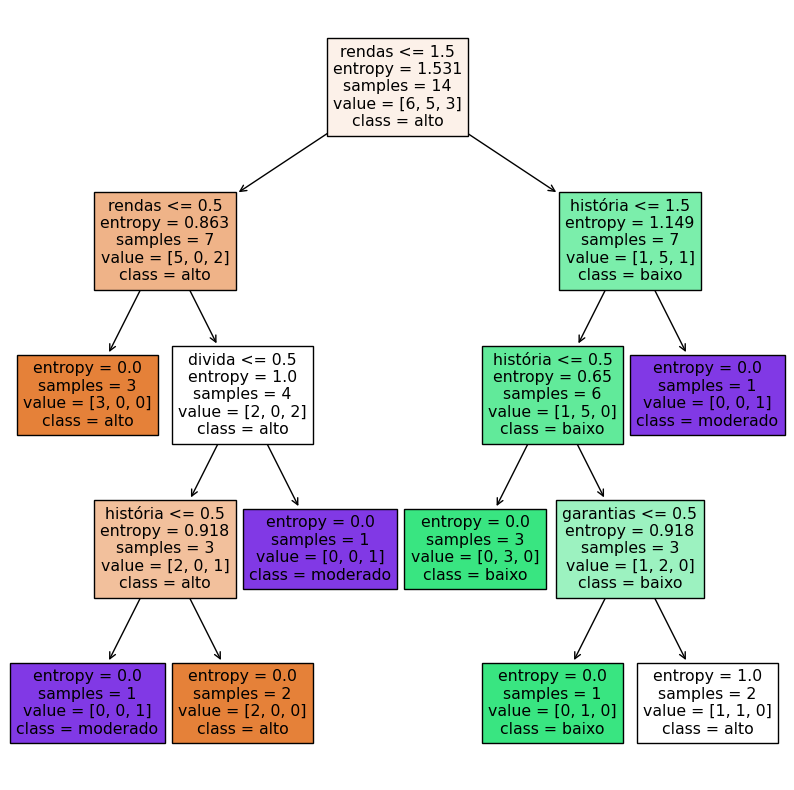

In [14]:
from sklearn import tree
previsores = ['história', 'divida', 'garantias', 'rendas']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [16]:
## história boa (0), dívida alta(0), garantias nenhuma (1), renda > 35 (2)
## história ruim (2), dívida alta (0), garantias adequada (0), renda <15 (0)
previsao = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

## Base Crédito ##

In [17]:
with open('data/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [18]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [19]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [20]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state= 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
previsoes_credito = arvore_credit.predict(X_credit_teste)

In [24]:
 ## comparando real com predições
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_credit_teste, previsoes_credito)

0.982

0.982

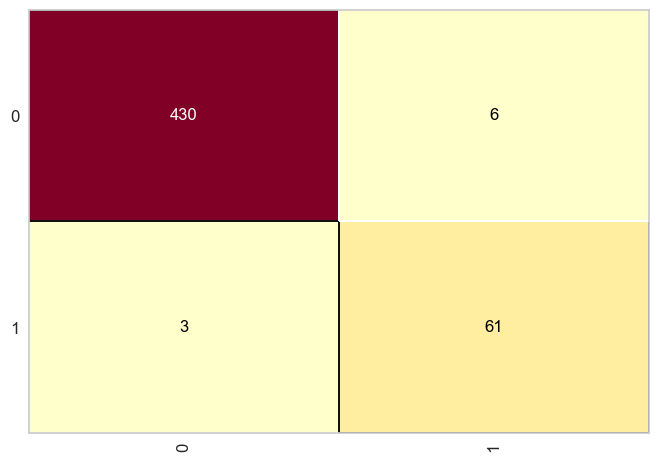

In [25]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [26]:
print(classification_report(y_credit_teste, previsoes_credito))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [32]:
arvore_credit.classes_

array([0, 1], dtype=int64)

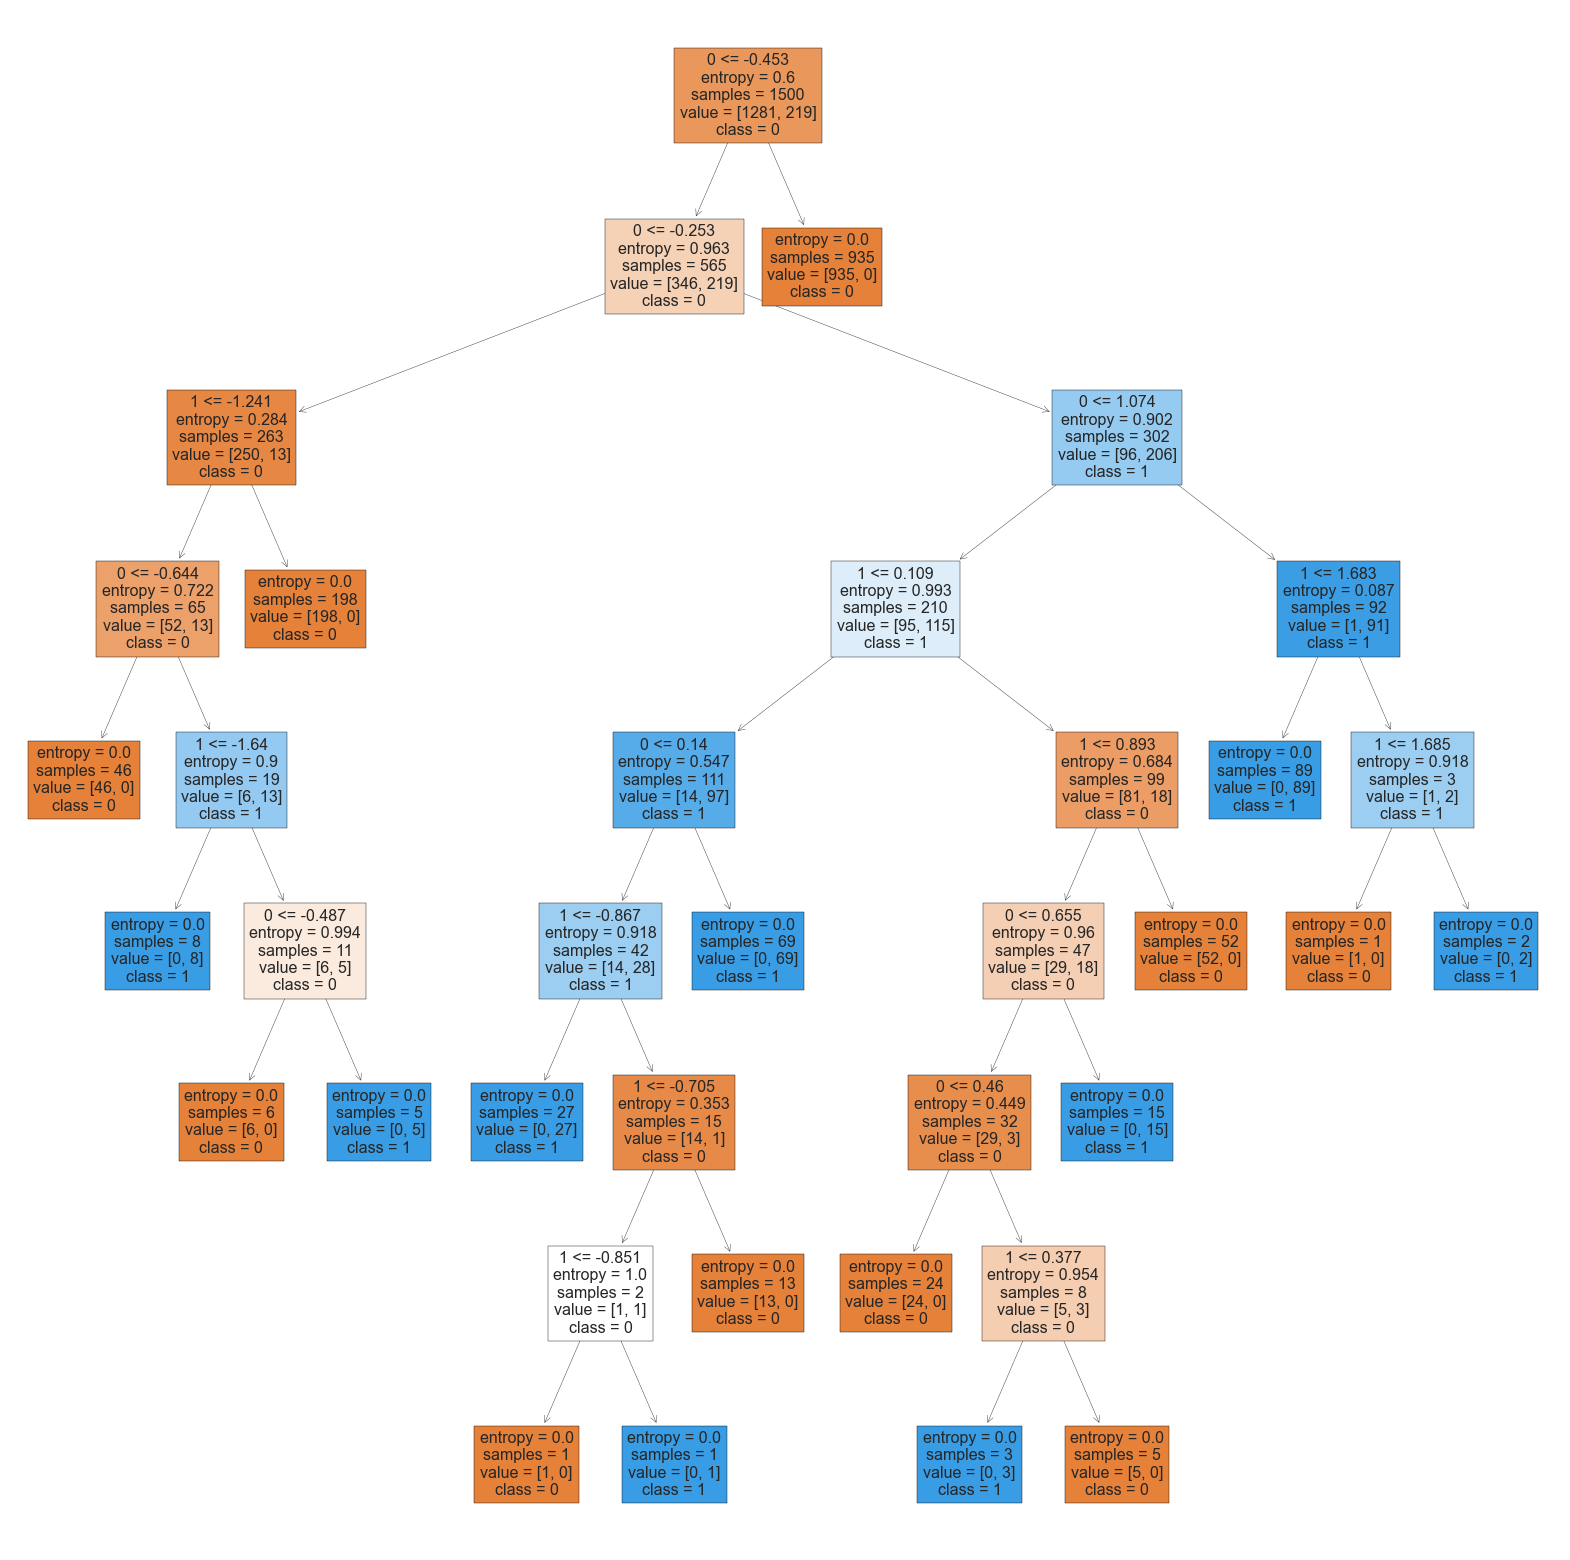

In [35]:
from sklearn import tree
previsores_credit = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsoes_credito, class_names=['0', '1'], filled=True);

## Base Censo ##

In [36]:
with open('data/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [38]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [40]:
arvore_census = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
previsoes_census = arvore_census.predict(X_census_teste)

In [42]:
accuracy_score(y_census_teste, previsoes_census)

0.8104401228249745

0.8104401228249745

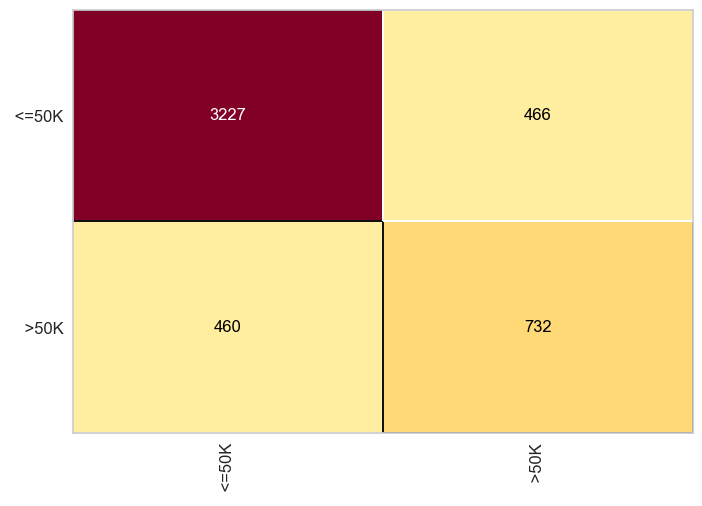

In [43]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [44]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

